In [26]:
filename = "YELP-Zipfs-Law-p2-2.pkl"
dill.dump_session(filename)

## Zipf's Law

Frequency of words in the document are inversely proportional to their term frequency rank. By graphing the data with the rank of the word on the x-axis, and the frequency of it on the y-axis, the result is similar to a log curve. Approximately how many words are needed to represent 50% of all words? 60% ?

Text(0.5, 1.0, "Zipf's Law Using Term Frequency of Yelp Data (all words, excluding stop words)")

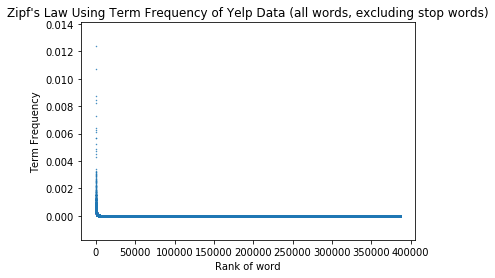

In [7]:
plt.scatter(x1_data, y2_data, s=0.2)
plt.xlabel('Rank of word')
plt.ylabel('Term Frequency')
plt.title("Zipf's Law Using Term Frequency of Yelp Data (all words, excluding stop words)")

In [8]:
# all words 
area_all = simps(y1_data, dx=1)
print("All Words: ", area_all)
print("Percentage of area: ", round(area_all/area_all,2))
# 10,000 words
area_10000 = simps(y3_data, dx=1)
print("10,000 words: ", area_10000)
print("Percentage of area: ", round(area_10000/area_all,2))
# 1,000 words
area_1000 = simps(y5_data, dx=1)
print("1,000 words: ", area_1000)
print("Percentage of area: ", round(area_1000/area_all,2))

All Words:  42763343.666666664
Percentage of area:  1.0
10,000 words:  40477224.58333333
Percentage of area:  0.95
1,000 words:  29195526.083333336
Percentage of area:  0.68


In [9]:
AllWordCount = list(AllWords.values())

In [21]:
num_words = []
percent_area = []
wordsBelow10000 = {}
for n in tqdm(range(10000,0,-25)):
    word_counts = AllWordCount[0:n] #includes the top to nth position of counts of words
    area = simps(word_counts, dx=1)
    percentage = round(area/area_all,4)
    num_words.append(n)
    percent_area.append(percentage)  
    wordsBelow10000[n] = percentage

100%|██████████| 400/400 [00:00<00:00, 1027.64it/s]


Text(0.5, 1.0, "Representation of the Area Under the Curve from Zipf's Law using Different Number of Unique WOrds")

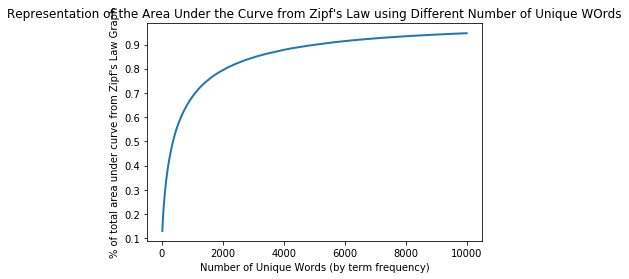

In [25]:
plt.plot(num_words, percent_area, linewidth = 2)
plt.xlabel('Number of Unique Words (by term frequency)')
plt.ylabel("% of total area under curve from Zipf's Law Graph")
plt.title("Representation of the Area Under the Curve from Zipf's Law using Different Number of Unique WOrds")

# Conclusion
### % area under curve = # unique words
100% = 386713 words <br>
90% = 5075 words <br>
80% = 2100 words <br>
70% = 1125 words <br>
60% = 650 words <br>
50% = 375 words <br>
40% = 225 words

In [24]:
wordsBelow10000

{10000: 0.9465,
 9975: 0.9465,
 9950: 0.9463,
 9925: 0.9463,
 9900: 0.946,
 9875: 0.946,
 9850: 0.9458,
 9825: 0.9457,
 9800: 0.9455,
 9775: 0.9455,
 9750: 0.9452,
 9725: 0.9452,
 9700: 0.945,
 9675: 0.9449,
 9650: 0.9447,
 9625: 0.9447,
 9600: 0.9444,
 9575: 0.9444,
 9550: 0.9442,
 9525: 0.9441,
 9500: 0.9439,
 9475: 0.9438,
 9450: 0.9436,
 9425: 0.9436,
 9400: 0.9433,
 9375: 0.9433,
 9350: 0.943,
 9325: 0.943,
 9300: 0.9427,
 9275: 0.9427,
 9250: 0.9424,
 9225: 0.9424,
 9200: 0.9421,
 9175: 0.9421,
 9150: 0.9418,
 9125: 0.9418,
 9100: 0.9415,
 9075: 0.9415,
 9050: 0.9412,
 9025: 0.9412,
 9000: 0.9409,
 8975: 0.9409,
 8950: 0.9406,
 8925: 0.9405,
 8900: 0.9403,
 8875: 0.9402,
 8850: 0.94,
 8825: 0.9399,
 8800: 0.9396,
 8775: 0.9396,
 8750: 0.9393,
 8725: 0.9392,
 8700: 0.939,
 8675: 0.9389,
 8650: 0.9386,
 8625: 0.9386,
 8600: 0.9383,
 8575: 0.9382,
 8550: 0.938,
 8525: 0.9379,
 8500: 0.9376,
 8475: 0.9375,
 8450: 0.9373,
 8425: 0.9372,
 8400: 0.9369,
 8375: 0.9368,
 8350: 0.9366,
 83

#### Loading Files/Code

In [1]:
import pandas as pd
import numpy as np
import operator
from nltk.corpus import stopwords 
from tqdm import tqdm
from collections import *
import dill
import geopandas as gpd
import matplotlib.pyplot as plt
import math
from scipy import sparse
import itertools
from scipy.integrate import simps
from numpy import trapz

def everyWord(file, stop_words):
    everyWord_counter = Counter()
    for comment in tqdm(file['1'].values):
        comment = [t.lower() for t in comment.replace('.',' ').replace(',',' ').split(" ") if ((len(t) > 1) and (t.lower() not in stop_words))]
        everyWord_counter.update(comment)
    AllWords_Sorted = OrderedDict(sorted(everyWord_counter.items(), key=operator.itemgetter(1), reverse=True))
    return AllWords_Sorted

#topktermFreq = dict(itertools.islice(sorted_dict.items(), k))

In [2]:
stop_words =  list(stopwords.words('english')) 
data = pd.read_csv('business_text_stripped.csv')

In [3]:
AllWords = everyWord(data, stop_words)

100%|██████████| 32022/32022 [05:58<00:00, 89.34it/s] 


In [4]:
x1_data = []
x1_log = []
y1_data = []
y2_data = []
y1_log = []
rank = 1
total_num_words1 = 0

for key in tqdm(AllWords.keys()):
    total_num_words1 += AllWords[key]
    
for key in tqdm(AllWords.keys()):
    x1_data.append(rank) # rank of each word
    x1_log.append(math.log10(rank))
    y1_data.append(AllWords[key]) # by term count
    y2_data.append(AllWords[key]/total_num_words1) # by term frequency
    y1_log.append(math.log10(AllWords[key]))
    rank += 1
    
AllWords2 = dict(itertools.islice(OrderedDict(sorted(AllWords.items(), 
                                                            key=operator.itemgetter(1), reverse=True)).items(), 10000))
x2_data = []
x2_log = []
y3_data = []
y4_data = []
y3_log = []
rank2 = 1
total_num_words2 = 0

for key in tqdm(AllWords2.keys()):
    total_num_words2 += AllWords2[key]
    
for key in tqdm(AllWords2.keys()):
    x2_data.append(rank2) # rank of each word
    x2_log.append(math.log10(rank2))
    y3_data.append(AllWords2[key]) # by term count
    y4_data.append(AllWords2[key]/total_num_words2) # by term frequency
    y3_log.append(math.log10(AllWords2[key])) # by term count
    rank2 += 1

AllWords3 = dict(itertools.islice(OrderedDict(sorted(AllWords.items(), 
                                                            key=operator.itemgetter(1), reverse=True)).items(), 1000))
x3_data = []
x3_log = []
y5_data = []
y6_data = []
y5_log = []
rank3 = 1
total_num_words3 = 0

for key in tqdm(AllWords3.keys()):
    total_num_words3 += AllWords3[key]
    
for key in tqdm(AllWords3.keys()):
    x3_data.append(rank3) # rank of each word
    x3_log.append(math.log10(rank3))
    y5_data.append(AllWords3[key]) # by term count
    y6_data.append(AllWords3[key]/total_num_words3) # by term frequency
    y5_log.append(math.log10(AllWords3[key])) # by term count
    rank3 += 1    

100%|██████████| 1000/1000 [00:00<00:00, 249809.65it/s]
